In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_breast_cancer
import warnings
import joblib
warnings.filterwarnings('ignore')

In [2]:
data = load_breast_cancer()
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
np.unique(y,return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [5]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='minority')
# X_sm, y_sm = smote.fit_resample(X, y)
# np.unique(y_sm,return_counts=True)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
X.shape

(569, 30)

In [8]:
y.shape

(569,)

In [9]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


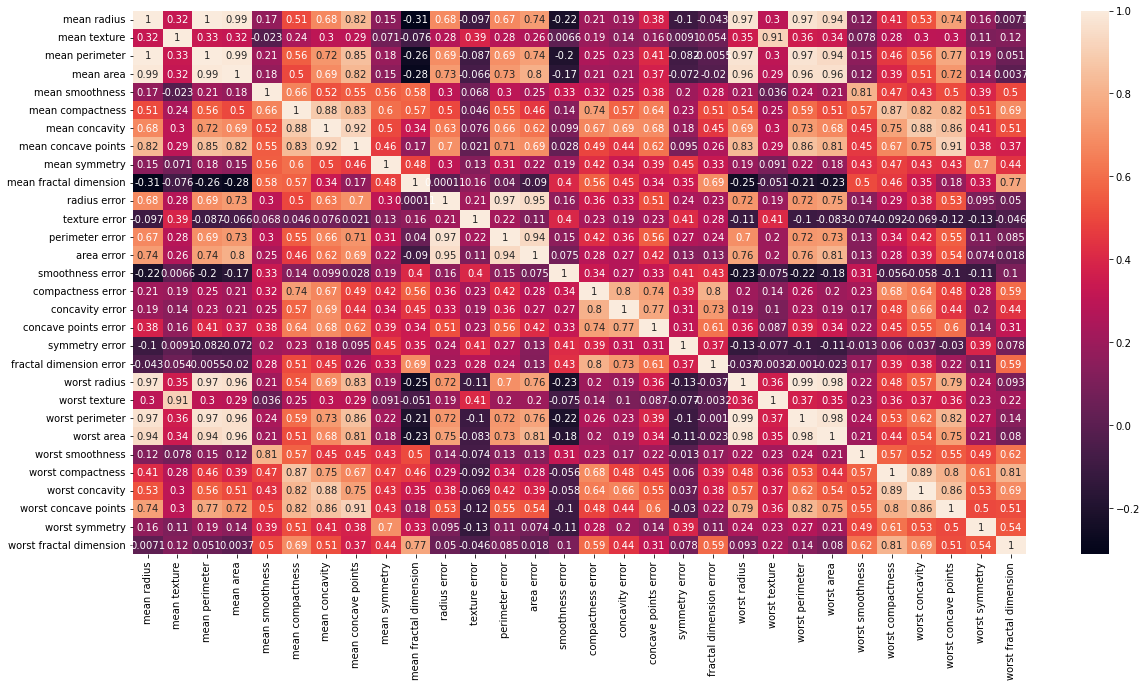

In [10]:
plt.figure(figsize=(20,10))
sn.heatmap(X.corr(), annot=True)
plt.show()

In [11]:
corr_matrix=X.corr().abs()

In [12]:
# from sklearn.decomposition import PCA
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,NaN,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,NaN,NaN,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,NaN,NaN,NaN,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,NaN,NaN,NaN,NaN,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,NaN,NaN,NaN,NaN,NaN,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,NaN,NaN,NaN,NaN,NaN,NaN,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [13]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

['mean perimeter',
 'mean area',
 'mean concave points',
 'perimeter error',
 'area error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst concave points']

In [14]:
X.drop(to_drop, axis=1, inplace=True)

In [15]:
X.shape

(569, 20)

In [16]:
X.isna().sum()

mean radius                0
mean texture               0
mean smoothness            0
mean compactness           0
mean concavity             0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst smoothness           0
worst compactness          0
worst concavity            0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [17]:
X_max = [i for i in X if X[i].max()>5]
X_max

['mean radius', 'mean texture']

In [18]:
X[X_max]

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


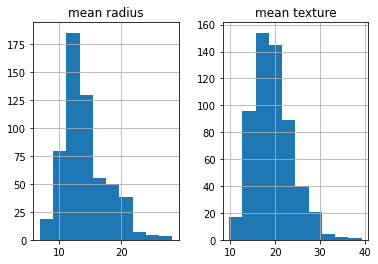

In [19]:
X[X_max].hist()
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X[X_max]=std.fit_transform(X[X_max])
X[X_max]

,mean radius,mean texture
0,1.097064,-2.073335
1,1.829821,-0.353632
2,1.579888,0.456187
3,-0.768909,0.253732
4,1.750297,-1.151816
...,...,...
564,2.110995,0.721473
565,1.704854,2.085134
566,0.702284,2.045574
567,1.838341,2.336457


In [21]:
X

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,1.829821,-0.353632,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,1.579888,0.456187,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,-0.768909,0.253732,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,1.750297,-1.151816,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,1.704854,2.085134,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,0.702284,2.045574,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,1.838341,2.336457,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 20), (114, 20), (455,), (114,))

In [24]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [25]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
tree.score(X_test,y_test)

0.9210526315789473

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
y_pred = tree.predict(X_test)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.94      0.93      0.94        71

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



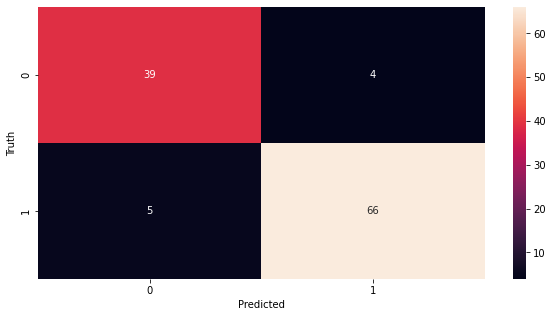

In [30]:
plt.figure(figsize=(10,5))
sn.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [32]:
log.fit(X_train,y_train)

LogisticRegression()

In [33]:
log.score(X_test,y_test)

0.8947368421052632

In [34]:
y_pred = log.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        43
           1       0.90      0.93      0.92        71

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114



In [36]:
from sklearn.model_selection import KFold, cross_val_score

In [37]:
kf = KFold(n_splits=5)

In [38]:
scores = cross_val_score(tree,X_train,y_train,cv=kf)
scores

array([0.89010989, 0.87912088, 0.9010989 , 0.93406593, 0.91208791])

In [39]:
scores.mean()

0.9032967032967033

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=2)

In [41]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [42]:
rfc.score(X_test,y_test)

0.9298245614035088

In [43]:
rfc_param = [{
    'n_estimators': [50,100,150],
    'max_depth':[None,5,10],
    'min_samples_split': [2,4,6]
}]

In [44]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rfc, rfc_param, cv=3, scoring='accuracy', return_train_score=True)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=50),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 4, 6],
                          'n_estimators': [50, 100, 150]}],
             return_train_score=True, scoring='accuracy')

In [45]:
gs.best_estimator_

RandomForestClassifier(n_estimators=150)

In [46]:
gs.score(X_test,y_test)

0.9210526315789473

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier()

In [49]:
knn_param = [{
    'n_neighbors':[3,5,10,15]
}]

In [50]:
gs = GridSearchCV(knn,knn_param,cv=5,return_train_score=True, scoring='accuracy')

In [51]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 10, 15]}],
             return_train_score=True, scoring='accuracy')

In [52]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [53]:
gs.best_params_

{'n_neighbors': 10}

In [54]:
gs.score(X_test,y_test)

0.9035087719298246

In [55]:
y_pred = gs.predict(X_test)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        43
           1       0.92      0.93      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
rsc = RandomizedSearchCV(knn,knn_param,cv=5)

In [59]:
rsc.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': [3, 5, 10, 15]}])

In [60]:
rsc.best_params_

{'n_neighbors': 10}

In [61]:
rsc.score(X_test,y_test)

0.9035087719298246

In [62]:
from sklearn.svm import SVC

In [63]:
s = SVC()

In [64]:
s.fit(X_train,y_train)

SVC()

In [65]:
s.score(X_test,y_test)

0.9385964912280702

In [66]:
bb=pd.DataFrame(0,index=np.arange(10), columns=['ID','ID1','ID2','ID3'])
bb

,ID,ID1,ID2,ID3
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [67]:
for n,i in enumerate(bb['ID']):
    bb.iloc[n]['ID1']=n
bb

,ID,ID1,ID2,ID3
0,0,0,0,0
1,0,1,0,0
2,0,2,0,0
3,0,3,0,0
4,0,4,0,0
5,0,5,0,0
6,0,6,0,0
7,0,7,0,0
8,0,8,0,0
9,0,9,0,0


In [68]:
from sklearn.ensemble import BaggingClassifier

In [69]:
b = BaggingClassifier(base_estimator=tree, n_estimators=100,max_samples=0.8, oob_score=True)

In [70]:
b.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True)

In [71]:
b.oob_score_

0.9494505494505494

In [72]:
score=cross_val_score(b,X,y,cv=5)
score

array([0.92982456, 0.93859649, 0.98245614, 0.94736842, 0.96460177])

In [73]:
score.mean()

0.9525694767893185

In [74]:
score = cross_val_score(rfc,X,y,cv=5)
score

array([0.92982456, 0.93859649, 0.99122807, 0.93859649, 0.96460177])

In [75]:
score.mean()

0.9525694767893185

In [76]:
X_train.shape

(455, 20)